In [2]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from ggplot import *
import numpy as np
import pandas as pd

data = pd.read_csv("gap.tsv", sep='\t')
data.head()

FileNotFoundError: [Errno 2] File gap.tsv does not exist: 'gap.tsv'

In [ ]:
# Exercise 1: Make a scatter plot of life expectancy across time.
life_exp = data['lifeExp']
years = data['year']
plt.plot(years, life_exp, 'o')
plt.title('Life Expectancy across Time')
plt.xlabel('Time in years')
plt.ylabel('Life expectancy')
plt.show()

In [ ]:
# Question 1: 
'''
Life expectancy appears to increase over time in years. For each year in the data, the scatter plot data appears to
have an increasing lowest life expectancy value, and an increasing largest life expetancy value. If we were to draw
a that fits the largest life expectancy values for each year it would be increasing, and the same applies to the
lowest life expectancy values and the mean of each year. The trend does appear to be linear.
'''

In [ ]:
# Question 2:
'''
The violin plots from 1982 to 2007 appear to be skewed towards the top of the violin plot, are unimodal and not
symmetric in shape. The violin plots from 1952 to 1957, also appear to be skewed, but this time they are skewed
towards the bottom of the life expectancy range. They are also unimodal and asymmetric.
The rest of the violin plots appear to be bimodal with some close to be symmetrical in shape.
'''

In [ ]:
# Question 3:
'''
Based off of my observation stated in question 1, that as years in time increases so does life expectancy,
I would reject the null hypothesis of no relation. From the violin plot of Life expectancy over time, it also shows
that as time increases, so does life expectancy. 
'''

In [ ]:
# Question 4:
'''
The transformation of life expectancy to residuals should produce violin plots similar to the violin plots of
Life Expectancy vs Year. This is because the probability distribution of life expectancy vs year should not change
even after the transformation. 
'''

In [ ]:
# Question 5
data

In [21]:
# Exercise 2:
# y = lifeExp, x = year

reg = linear_model.LinearRegression()

train_data = data[['year', 'lifeExp']].sample(frac=0.70, replace=True)
test_data = data[['year', 'lifeExp']].sample(frac=0.50, replace=True)

x_train = train_data['year'].values.reshape(-1, 1) 
x_test = test_data['year'].values.reshape(-1, 1)

y_train = train_data['lifeExp'].values.reshape(-1, 1)
y_test = test_data['lifeExp'].values.reshape(-1, 1)

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print('Coefficients: %f' % reg.coef_)
print('Intercept: %f' % reg.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 0.341059
Intercept: -615.877172
Mean squared error: 135.21
Coefficient of determination: 0.19


In [ ]:
# Question 6:
'''
The coefficient of the Linear Regression Model made above is ~0.3259. This is the average life expectancy increase
every year around the world.
'''


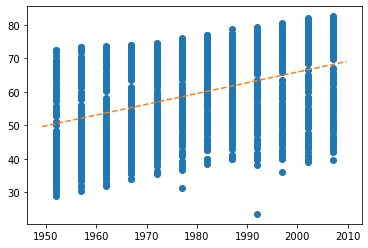

In [7]:
# Question 7
'''
I reject the null hypothesis because based off of the linear regression model above, there appears to be a linear
relationship between year and life expectancy. It is also clear from the graph produced below:

'''

life_exp = data['lifeExp']
years = data['year']
plt.plot(years, life_exp, 'o')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
d_inter = reg.intercept_[0]
d_coef = reg.coef_[0][0]
y_vals = d_inter + d_coef * x_vals
plt.plot(x_vals, y_vals, '--')


In [1]:
# Exercise 3:

data['residuals'] = data['lifeExp'] - (reg.intercept_[0] + reg.coef_[0][0] * data['year'])

ggplot(aes(x='year', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="Residuals of Life Expectancy vs Year", x = "Year", y = "Residuals")


NameError: name 'data' is not defined

In [71]:
# Question 8:
'''
The plot from Exercise 3 does match my expectations from question 4.
'''

'\nThe plot from Exercise 3 does match my expectations from question 4.\n'

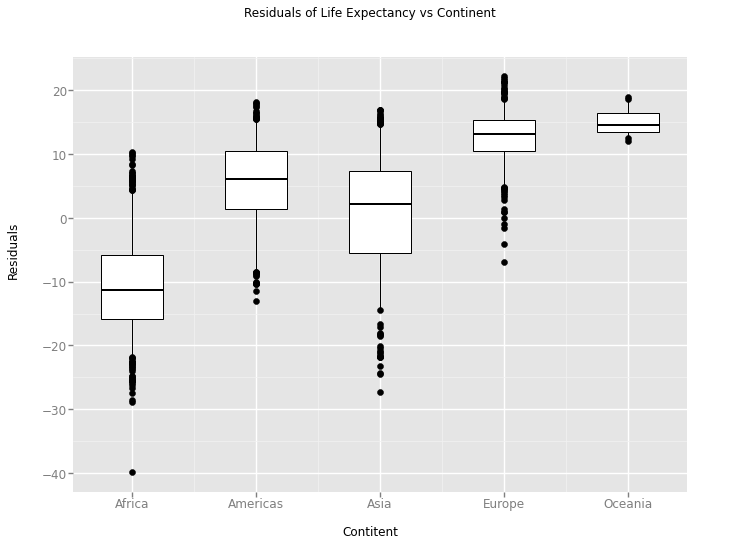

<ggplot: (8726441554381)>

In [9]:
# Exercise 4:
ggplot(aes(x='continent', y='residuals'), data=data) +\
    geom_boxplot() +\
    labs(title="Residuals of Life Expectancy vs Continent", x = "Contitent", y = "Residuals")

In [ ]:
# Question 9:


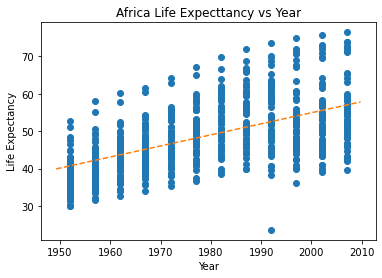

Coefficients: 0.295968
Intercept: -537.009234
Mean squared error: 55.85
Coefficient of determination: 0.32


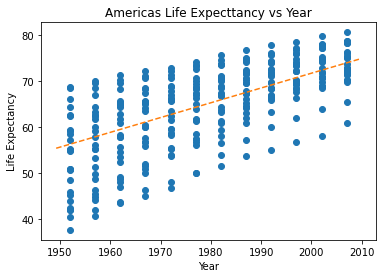

Coefficients: 0.322332
Intercept: -572.932728
Mean squared error: 47.33
Coefficient of determination: 0.46


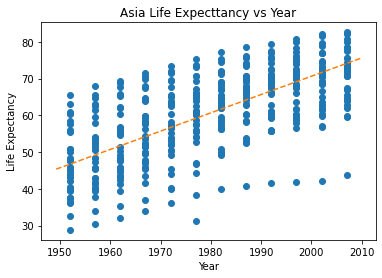

Coefficients: 0.498464
Intercept: -926.289672
Mean squared error: 71.18
Coefficient of determination: 0.50


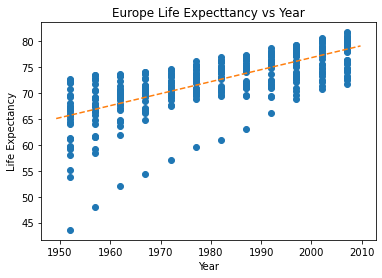

Coefficients: 0.231814
Intercept: -386.773506
Mean squared error: 20.75
Coefficient of determination: 0.37


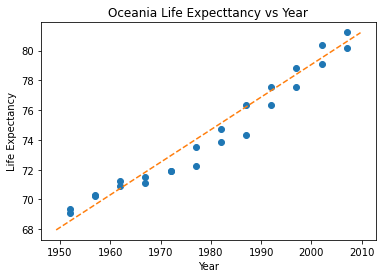

Coefficients: 0.219086
Intercept: -359.102252
Mean squared error: 0.44
Coefficient of determination: 0.96


In [23]:
# Exercise 5

cont_increase_per_year = {}
cont = np.unique(data['continent'].values)

for c in cont:
    reg = linear_model.LinearRegression()

    train_data = data[['year', 'lifeExp']][data['continent'] == c].sample(frac=0.70, replace=True)
    test_data = data[['year', 'lifeExp']][data['continent'] == c].sample(frac=0.50, replace=True)

    x_train = train_data['year'].values.reshape(-1, 1) 
    x_test = test_data['year'].values.reshape(-1, 1)

    y_train = train_data['lifeExp'].values.reshape(-1, 1)
    y_test = test_data['lifeExp'].values.reshape(-1, 1)

    reg.fit(x_train, y_train)

    y_pred = reg.predict(x_test)

    
    life_exp = data['lifeExp'][data['continent'] == c]
    years = data['year'][data['continent'] == c]
    plt.plot(years, life_exp, 'o')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = reg.intercept_[0] + reg.coef_[0][0] * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.title(c + ' Life Expecttancy vs Year')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.show()
    
    cont_increase_per_year[c] = reg.coef_
    print('Coefficients: %f' % reg.coef_)
    print('Intercept: %f' % reg.intercept_)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



In [ ]:
# Question 10:
'''
Since the life expectancy changes at different rates for each continent, 
an interaction term is needed. 
'''

In [22]:
# Exercise 6:
years = np.unique(data['year'].values)
cal_inter_continent = []
cal_inter_year = []
cal_inter_mean = []

for curr_cont in cont:
    for year in years:
        cal_inter_continent.append(curr_cont)
        cal_inter_year.append(year)
        cal_inter_mean.append(data[['lifeExp']][(data['continent'] == c) & (data['year'] == year)].mean(axis=0)[0])
                
cal_inter_df = pd.DataFrame(columns=['continent', 'year', 'mean'])
cal_inter_df['continent'] = cal_inter_continent
cal_inter_df['year'] = cal_inter_year
cal_inter_df['mean'] = cal_inter_mean

def inter_calc(row):
    inter_mean = cal_inter_df[(cal_inter_df['year'] == row['year']) & (cal_inter_df['continent'] == row['continent'])]['mean'].values[0]
    return 0.5 * (d_inter + d_coef * row['year']) + (0.5 * float(inter_mean))

data['continent year interaction'] = data.apply(lambda row: inter_calc(row), axis=1)



reg6 = linear_model.LinearRegression()

train_data6 = data[['year', 'continent year interaction']].sample(frac=0.70, replace=True)
test_data6 = data[['year', 'continent year interaction']].sample(frac=0.50, replace=True)

x_train6 = train_data6['year'].values.reshape(-1, 1) 
x_test6 = test_data6['year'].values.reshape(-1, 1)

y_train6 = train_data6['continent year interaction'].values.reshape(-1, 1)
y_test6 = test_data6['continent year interaction'].values.reshape(-1, 1)

reg6.fit(x_train6, y_train6)

y_pred6 = reg6.predict(x_test6)

print('Coefficients: %f' % reg6.coef_)
print('Intercept: %f' % reg6.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test6, y_pred6))
print('Coefficient of determination: %.2f' % r2_score(y_test6, y_pred6))

Coefficients: 0.265635
Intercept: -458.981998
Mean squared error: 0.09
Coefficient of determination: 1.00


In [41]:
# Question 12:
# Using the data from Exercise 5. 

k12 = list(cont_increase_per_year.keys())
v12 = list(cont_increase_per_year.values())

for i in range(0, len(k12)):
    print('%s: %f' % (k12[i], v12[i]))        

Africa: 0.295968
Americas: 0.322332
Asia: 0.498464
Europe: 0.231814
Oceania: 0.219086


In [42]:
# Exercise 7:


In [45]:
# Question 12:

In [46]:
# Exercise 8:

In [43]:
# Part 2: Classification
# Problem 1:

# Stochastic Gradient Descrent - Multivariate
# Training data (X, y), T time steps, alpha step
def grad_descent(X, y, T, alpha):
    m, n = X.shape      # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T)     # track loss over time
    
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
        
    return theta, f